---------------------------------------------------------------------
# **Exploratory Data Analysis** #2

>***UC-Irvine Online Shoppers Purchasing Intention Dataset***
---------------------------------------------------------------------

**Installing necessary packages**

In [ ]:
!pip install scikit-learn
!pip install seaborn

In [2]:
import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

**Reading the dataset to Pandas dataframe**

In [3]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv"
df_original = pd.read_csv (url)

**For the next steps we may need to convert columns with strings to numerical to further explore the data. let's check the data types again.** 

In [4]:
df_original.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

**The object data types can be converted to integers for further processing. Let's use a copy of the dataset in case we need the original one again.**

In [5]:
#creating a copy of dataset
df1= df_original.copy()

#converting Month names to the corresponding numbers
Month={'Feb':2, 'Mar':3, 'May':5, 'Oct':10, 'June':6, 'Jul':7, 'Aug':8, 'Nov':11, 'Sep':9,'Dec':12}
df1['Month']=df1['Month'].map(Month)

#converting visitor types to integers
VisitorType={'Returning_Visitor':1, 'New_Visitor':2, 'Other':3}
df1['VisitorType']=df1['VisitorType'].map(VisitorType)

#checking the datat types on the copied dataframe 
df1.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                        int64
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                  int64
Weekend                       bool
Revenue                       bool
dtype: object

* As we can see "Month" and "VisitorType" are not objects anymore. 

**Looking at the corrolation between attributes**

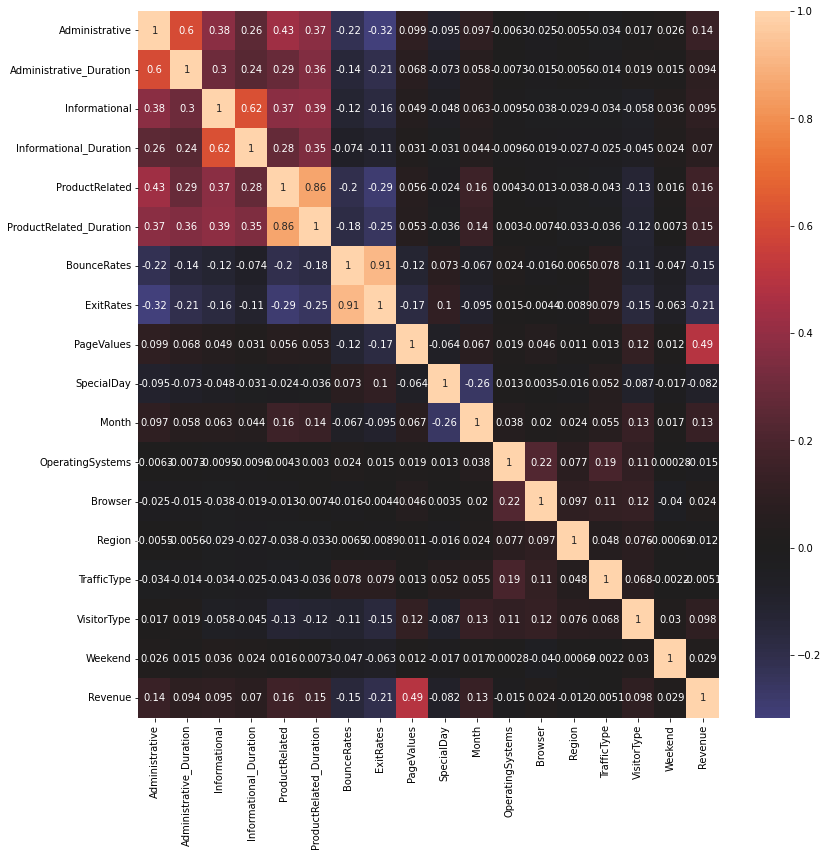

In [6]:
#creating the correlation matrix
CorrMatrix= df1.corr()

#setting the heat map size
plt.figure(figsize = (13,13))

#creating a heat map from the correlation Matrix, adding the correlation number 
#to the map and using zero as centre of the heat map 
sns.heatmap(CorrMatrix, annot=True, center=0)

#printing the heat map
plt.show()

* None of the attributes are highly corrolated with the dependent variable "Revenue", however PageValues corrolation with "Revenue" is considerably higher (0.49) compared to all other attributes; as the second highest corrolation brlongs to ExitRates at -0.21!

* BounceRate and ExitRate are highly corrolated (0.91). This is a point to consider during all stages of the project, and specifically modelling. 